In [21]:
import pandas as pd
import numpy as np

### Functions

- parameter: is when you define a function so
  - def function_name(parameter)
- argument: is when you call the function and pass some value
  - function_name(argument)
- Docstrings: Used to describe what your function does
  - Plcaed in the immediate line after the function header in triple quotes
  - `def function_name(parameter):`
        `"""What does this function do?"""`

- The part of the header that specifies the function name and parameter(s), is known as the **signature** of the function. 
- You can make a function **return** multiple values by returning **tuples**
  - return x, y has the same result as return (x, y)
  - tuples are immutable unlike Python lists
  - tuples are constructed using a set pf parentheses
  - you can unpack a tuple like this:
    - nums = (1,2,3)
    - a, b, c = nums
    - and so a = 1, b = 2, and c = 3
  - you can access tuple elements similar to how you subset Python lists so 
    - nums = (1,2,3)
    - a = nums[1] will assign 2 to a
        

### Scope in functions 

- Not all objects arte accessible everywhere in a script
- 3 types of Scope
  - Global Scope: defined in the main body of a script
  - Local Scope: defined inside a function
  - Built-in Scope: names in the predefined built-ins module eg. print(), sum()

In [5]:
from IPython.display import Image

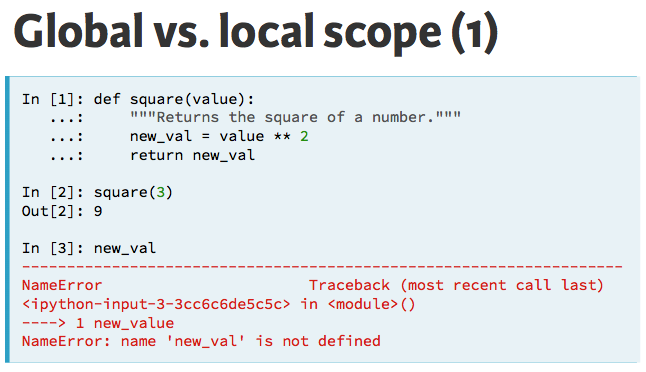

In [6]:
Image('localvsglobalscope1.png')

Here we have defined `new_val` in the Local Scope and so we can't access it in the Global Scope.

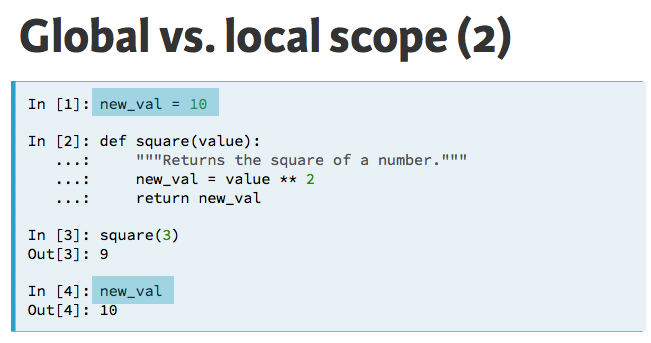

In [8]:
Image('localvsglobalscope2.png')

Here we have defined `new_val` Globally before defining and calling the function. Anytime we call the name in the Global Scope, it will access the name in the Global Scope hence `new_val` prints 10. Anytime we call the name in the Local Scope, it will first look for it in the Local Scope and then go on to the Global Scope if it does not find it in the Local Scope and so...

In [12]:
a = 5

def func1(val):
    b = a ** 2
    return b

func1(3)

25

In [13]:
a = 5

def func1(val):
    a = 3
    b = a ** 2
    return b

func1(3)

9

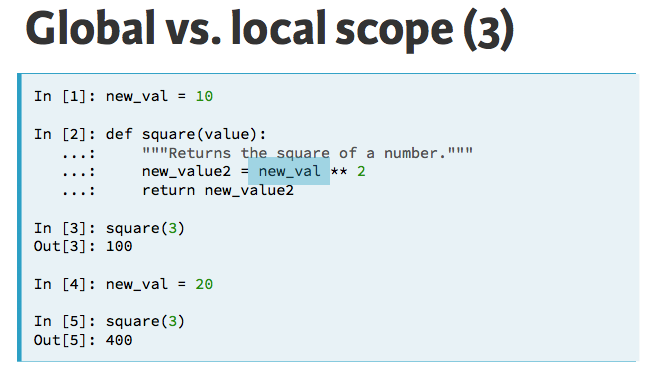

In [9]:
Image('localvsglobalscope3.png')

Note from above that the value of the Global Variable is taken at the **time** of the function not **when** the function is defined.

Also, note that first the Local Scope is searched and then the Global Scope. If the name is in neither, then the Built-In Scope is searched for.

What if we want to alter a Global Scoped variable from inside the Local Scope of a function?
  - We use the `global` keyword. Check the following 2 examples

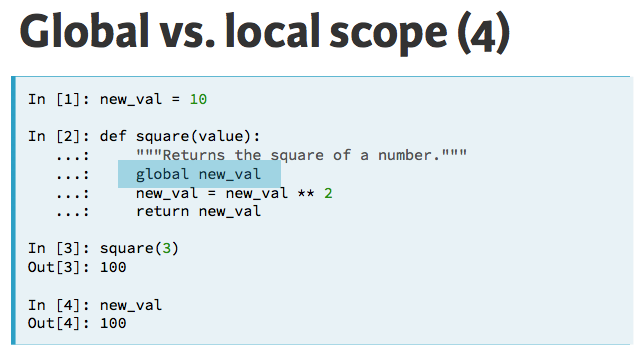

In [14]:
Image('localvsglobalscope4.png')

In [1]:
# Create a string: team
team = "teen titans"

# Define change_team()
def change_team():
    """Change the value of the global variable team."""

    # Use team in global scope
    global team

    # Change the value of team in global: team
    team = "justice league"

# Print team
print(team)

# Call change_team()
change_team()

# Print team
print(team)

teen titans
justice league


`team` was "teen titans" until we changed the value of `team` by calling the `change_team` function which altered the value of `team` by using the `global` keyword!

In [20]:
# Check all builtin functions!
import builtins

print(dir(builtins))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'SyntaxWarning', 'SystemError

### Nested Functions

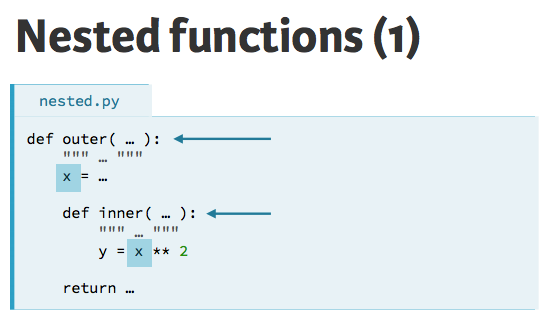

In [21]:
Image('nestedfunctions1.png')

- outer() is known to **enclose** inner() hence it's an **enclosing function**
- **x** is first searched within the Scope of inner(), then outer(), then Global and lastly Built-ins!

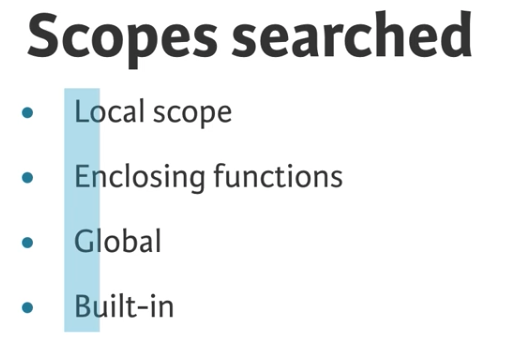

In [22]:
# The LEGB rule
Image('legb.png')

#### Nested Functions II

- One other pretty cool reason for nesting functions is the idea of a **closure**. This means that the nested or inner function remembers the state of its enclosing scope when called. Thus, anything defined locally in the enclosing scope is available to the inner function even when the outer function has finished execution.
- Following example will make that clear

In [23]:
# Define echo
def echo(n):
    """Return the inner_echo function."""

    # Define inner_echo
    def inner_echo(word1):
        """Concatenate n copies of word1."""
        echo_word = word1 * n
        return echo_word

    # Return inner_echo
    return inner_echo

# Call echo: twice
twice = echo(2)

# Call echo: thrice
thrice = echo(3)

# Call twice() and thrice() then print
print(twice('hello'), thrice('hello'))

hellohello hellohellohello


`twice` actually remembers that `echo` was passed 2 even when `thrice` is executed after it which passed 3 to `echo`. Hence in the subsequent print calls, both 2 and 3 are remembered by the Enclosing Scope. This is the property of **closure**. 

The keyword `nonlocal` within a nested function can be used to alter the value of a variable defined in the enclosing scope.

Always remember that when you are using `global` and `nonlocal` within a function, you have to **call** that particular function so that the code inside it actually runs and hence `global` and/or `nonlocal` actually get executed!

In [24]:
# Usage of nonlocal
# Define echo_shout()
def echo_shout(word):
    """Change the value of a nonlocal variable"""
    
    # Concatenate word with itself: echo_word
    echo_word = word + word
    
    #Print echo_word
    print(echo_word)
    
    # Define inner function shout()
    def shout():
        """Alter a variable in the enclosing scope"""    
        #Use echo_word in nonlocal scope
        nonlocal echo_word
        
        #Change echo_word to echo_word concatenated with '!!!'
        echo_word = echo_word + '!!!'
    
    # Call function shout()
    shout()
    
    #Print echo_word
    print(echo_word)

#Call function echo_shout() with argument 'hello'    
echo_shout('hello')

hellohello
hellohello!!!


### Default Arguments

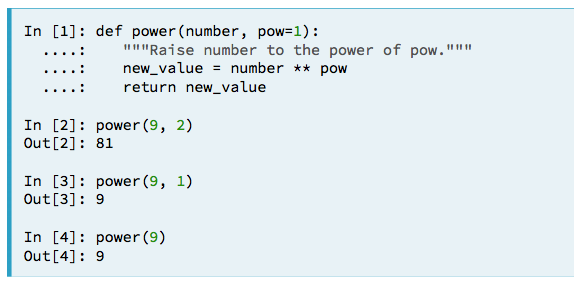

In [25]:
Image('defaultarg.png')

Notice, how passing an argument to function call actually overrides the default parameter of `pow = 1`

In [39]:
# Define shout_echo
def shout_echo(word1, echo = 1):
    """Concatenate echo copies of word1 and three
     exclamation marks at the end of the string."""

    # Concatenate echo copies of word1 using *: echo_word
    echo_word = word1 * echo

    # Concatenate '!!!' to echo_word: shout_word
    shout_word = echo_word + '!!!'

    # Return shout_word
    return shout_word

# Call shout_echo() with "Hey": no_echo
no_echo = shout_echo('Hey')

# Call shout_echo() with "Hey" and echo=5: with_echo
with_echo = shout_echo('Hey', echo=5)

# Print no_echo and with_echo
print(no_echo)
print(with_echo)

Hey!!!
HeyHeyHeyHeyHey!!!


### Flexible Arguments

We can use flexible arguments when we are not sure of the number of arguments to pass to function call!

In [30]:
# Note that *args will be a tuple and so you need to pass a tuple as arguments in function call
def sum_all(*args):
    """Function that adds numbers irrespective of their volumes"""
    sum_num = 0
    for num in args:
        sum_num = sum_num + num
    print(sum_num)

sum_all(1,2,3)

sum_all(1)

sum_all(1,2,3,4,5,6,7,8,9,10)

6
1
55


Note that **args** converts the data to a **tuple** and so you need to unpack it and do further stuff! Because of this, arguments passed to function call also have to be in the form of a tuple!

What if we want to pass **keyworded arguments** or basically **arguments preceded by identifiers**? 
  - That's where we use `**kwargs`
  - for example..

In [37]:
# Note kwargs will unpack as a dictionary and so your arguments will also be in the form of a dictionary
def print_all(**kwargs):
    for k,v in kwargs.items():
        print(k+": "+v)

print_all(name="Sauvik Dutta", hobby="Photography enthusiast")

name: Sauvik Dutta
hobby: Photography enthusiast


#### Also very important:
  - args and kwargs can be replaced with anything 
  - what's important is the number of asterisks
  - for example..

In [38]:
def print_all(**whatever):
    for k,v in whatever.items():
        print(k+": "+v)

print_all(name="Sauvik Dutta", hobby="Photography enthusiast")

name: Sauvik Dutta
hobby: Photography enthusiast


In [40]:
# Write a random function for multiple flexible arguments

def func2(word, *args):
    new_word = word
    for words in args:
        new_word = new_word + ' ' + words
    print(new_word)
    
func2('Hello', 'World')
func2('Hello', 'World', 'I', 'am', 'Sauvik', 'Dutta')
func2('Hello')

Hello World
Hello World I am Sauvik Dutta
Hello


### Lambda Functions

- lambda x,y: x ** y
- 

In [6]:
raise_to_power = lambda x,y: x ** y
raise_to_power(2,3)

8

- `map(func, seq)`
- `filter(func, seq)`
- Where seq can be anything out of a Pandas Series, Numpy Arrays or legacy Python Lists
- The `reduce()` function is useful for performing some computation on a list and, unlike `map()` and `filter()`, returns a single value as a result. To use `reduce()`, you must import it from the `functools` module.

In [18]:
a = [1,2,3]

In [19]:
print(list(map((lambda x: x**2), a)))

[1, 4, 9]


In [22]:
print(list(map((lambda x: x**2), pd.Series(a))))

[1, 4, 9]


In [23]:
print(list(map((lambda x: x**2), np.array(a))))

[1, 4, 9]


In [24]:
b = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

In [25]:
# Use filter() to filter down on the above list with words > 6 characters
print(list(filter(lambda x: len(x) > 6, b)))

['samwise', 'aragorn', 'legolas', 'boromir']


In [26]:
# Import reduce from functools
from functools import reduce

# Create a list of strings: stark
stark = ['robb', 'sansa', 'arya', 'eddard', 'jon']

# Use reduce() to apply a lambda function over stark: result
result = reduce(lambda item1, item2: item1 + item2, stark)

# Print the result
print(result)

robbsansaaryaeddardjon


### Error Handling!

`try-except` clause. 

Python tries to run the code using `try`. If there's and exception, the code following `except` is run!

In [28]:
def sqrt_num(x):
    """Returns the square root of a number"""
    try:
        print(x**0.5)
    except TypeError:
        print('x must be an integer or a float')

sqrt_num(25)
sqrt_num('Hello')

5.0
x must be an integer or a float


Note that `TypeError` is just one type of error. There are multiple other error types like `ValueError`, `UnboundLocalError` or `UnicodeError`.

Instead of printing an error message, if you want to **raise** an error, you need to use the `raise` keyword which you can do in an `if` condition. For example..

In [29]:
def sqrt_num(x):
    """Returns the square root of a number"""
    if x < 0:
        raise ValueError('x must be non-negative')
    try:
        print(x**0.5)
    except TypeError:
        print('x must be an integer or a float')

sqrt_num(25)
sqrt_num(-5)

5.0


ValueError: x must be non-negative

Note how `ValueError` is used like a function unline `TypeError`.